In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, learning_curve, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import statsmodels.api as sm
from sklearn.feature_selection import SelectKBest, mutual_info_classif, RFE
from sklearn.decomposition import PCA


In [28]:
df= pd.read_csv("ObesityDataSet_raw_and_data_sinthetic.csv")
df




,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [29]:
df.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [30]:
df.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

## Removing Missing Values

In [32]:
for column in df.columns:
    if df[column].isnull().any():  
        mean_value = df[column].mean()  
        df[column] = df[column].fillna(mean_value) 
df.columns = df.columns.str.strip()

df.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

# Initial Summary

In [33]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

### Separating Numerical and Categorical Columns


In [35]:
numerical_columns = df.select_dtypes(include=[int, float]).columns
categorical_columns = df.select_dtypes(include=[object]).columns

print("Numerical columns:", numerical_columns)
print("Categorical columns:", categorical_columns)

Numerical columns: Index(['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE'], dtype='object')
Categorical columns: Index(['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE',
       'SCC', 'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')


# Box Plot to see Outliers

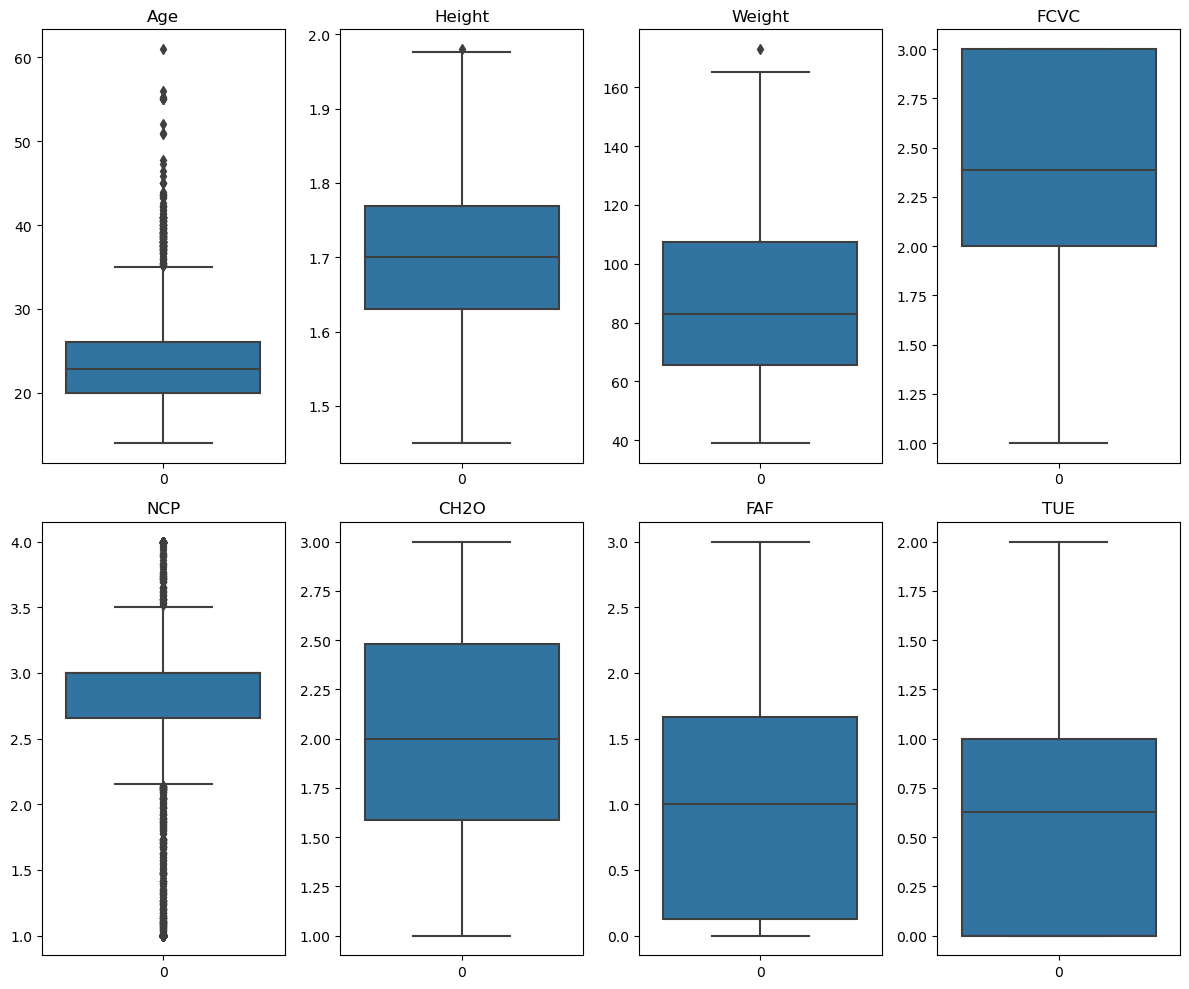

In [36]:
plt.figure(figsize=(12, 10))
num_plots = len(numerical_columns)
num_rows = (num_plots - 1) // 4 + 1  # Calculate the number of rows needed
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(num_rows, 4, i)  # Adjust the number of columns to 4
    sns.boxplot(df[col])
    plt.title(col)
plt.tight_layout()
plt.show()


## Removing Outliers


In [37]:
def remove_outliers(df):
    for column in df.select_dtypes(include=['int', 'float']).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# Remove outliers from all numerical columns
df_cleaned = remove_outliers(df)



# With and Without Cross Validation

In [38]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import statsmodels.api as sm

# Assuming 'Rented Bike Count' is your target column
X = df.drop(columns=['Weight'])

# Exclude non-numeric columns
numeric_columns = X.select_dtypes(include=[np.number]).columns
X_numeric = X[numeric_columns]

y = df['Weight']

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numeric)

# Without cross-validation
print("Without Cross-Validation:")
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initializing the KNN regressor
k = 5  # You can change the value of k
knn_regressor = KNeighborsRegressor(n_neighbors=k)

# Fitting the model
knn_regressor.fit(X_train, y_train)

# Making predictions
y_pred = knn_regressor.predict(X_test)

# Calculating evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r_squared = r2_score(y_test, y_pred)

# Calculating AIC using statsmodels
X_train_with_const = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train_with_const)
results = model.fit()
aic_val = results.aic
bic_val = results.bic
p_values = results.pvalues

# Printing evaluation metrics
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r_squared)
print("AIC:", aic_val)
print("BIC:", bic_val)
print("P-Values:")
print(p_values)
print()

# With cross-validation
print("With Cross-Validation:")
# Initializing the KNN regressor
knn_regressor_cv = KNeighborsRegressor(n_neighbors=k)

# Initializing KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Calculating evaluation metrics using cross-validation
mae_scores = cross_val_score(knn_regressor_cv, X_scaled, y, cv=kf, scoring='neg_mean_absolute_error')
mse_scores = cross_val_score(knn_regressor_cv, X_scaled, y, cv=kf, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-mse_scores)
r2_scores = cross_val_score(knn_regressor_cv, X_scaled, y, cv=kf, scoring='r2')

# Printing evaluation metrics
print("MAE:", abs(mae_scores.mean()))
print("MSE:", abs(mse_scores.mean()))
print("RMSE:", rmse_scores.mean())
print("R-Squared:", r2_scores.mean())


Without Cross-Validation:
MAE: 8.895748542316785
MSE: 194.48344590663314
RMSE: 13.945732175351466
R-Squared: 0.7241803567958769
AIC: 15080.653088060815
BIC: 15124.103485462063
P-Values:
const     0.000000e+00
x1        1.585967e-17
x2       1.331218e-110
x3        2.014540e-30
x4        8.984729e-01
x5        1.245616e-07
x6        5.552942e-21
x7        8.830282e-01
dtype: float64

With Cross-Validation:
MAE: 8.168809308178997
MSE: 181.4378551371608
RMSE: 13.440386151909063
R-Squared: 0.7344994179344363


# SUMMARY:
1) The model shows a good fit to the data with a relatively low MAE, MSE, and RMSE. Both with and without cross-validation, the model explains over 72% of the variance in the target variable (R-Squared).
2) Cross-validation seems to have slightly improved the model performance, reducing the MAE and MSE.
3) All features except the constant term (intercept) appear to be statistically significant in explaining the target variable.
4) These metrics are typically used for model selection when comparing multiple models, and cross-validation is often a separate step from final model selection.
5) Overall, the results suggest a promising linear regression model with good fit and statistically significant features.
6) Cross-validation has provided a more robust estimate of the model's generalizability.

# With RFE (Recursive Feature Elimination)

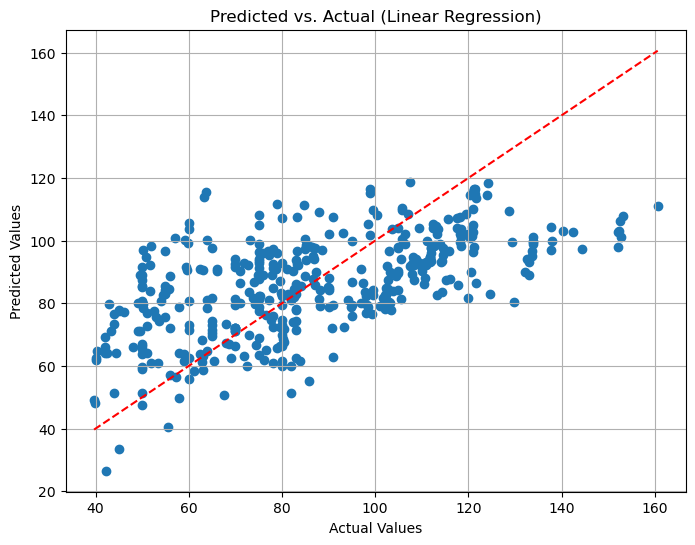

Linear Regression Results:
R-squared: 0.371777517908114
Mean Squared Error: 442.96654035923183
Mean Absolute Error: 17.336739262067038
Root Mean Squared Error (RMSE): 21.04677030708588




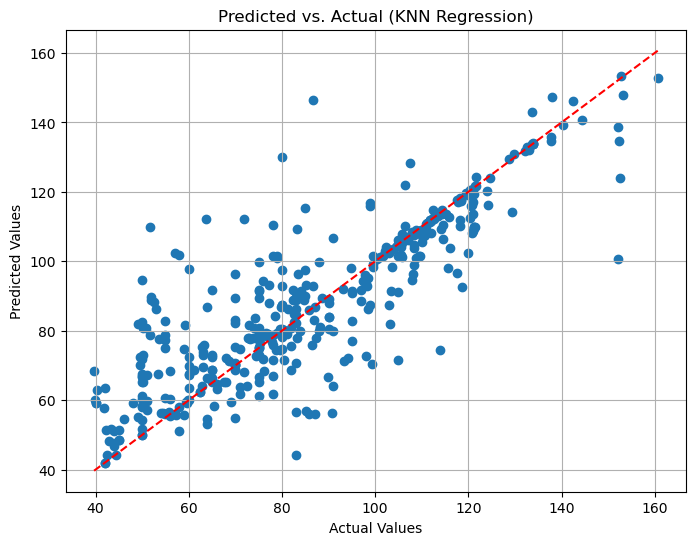

KNN Regression Results:
R-squared: 0.7241803567958769
Mean Squared Error: 194.48344590663314
Mean Absolute Error: 8.895748542316785
Root Mean Squared Error (RMSE): 13.945732175351466




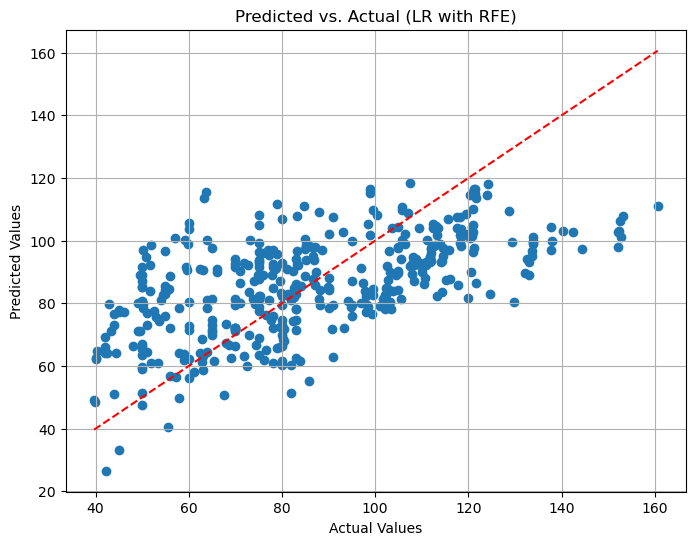

Linear Regression with RFE Results:
R-squared: 0.3716363791012838
Mean Squared Error: 443.0660588749714
Mean Absolute Error: 17.342939647984622
Root Mean Squared Error (RMSE): 21.049134397285115




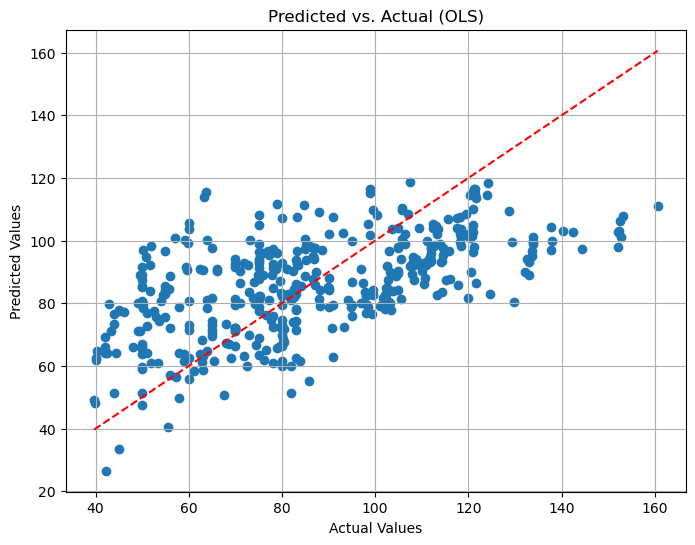


######################### OLS ###################
                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.354
Model:                            OLS   Adj. R-squared:                  0.351
Method:                 Least Squares   F-statistic:                     131.4
Date:                Mon, 01 Apr 2024   Prob (F-statistic):          2.56e-154
Time:                        01:56:07   Log-Likelihood:                -7532.3
No. Observations:                1688   AIC:                         1.508e+04
Df Residuals:                    1680   BIC:                         1.512e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c

In [40]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt

# Assuming 'life_expectancy' is your target column
X = df.drop(columns=['Weight'])

# Exclude non-numeric columns
numeric_columns = X.select_dtypes(include=[np.number]).columns
X_numeric = X[numeric_columns]

y = df['Weight']

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numeric)


# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)

# Plotting Predicted vs. Actual for LR model
plt.figure(figsize=(8, 6))
plt.scatter(y_test, lr_predictions)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Adding a learning line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs. Actual (Linear Regression)")
plt.grid(True)
plt.show()

# Print Linear Regression results
print("Linear Regression Results:")
print("R-squared:", r2_score(y_test, lr_predictions))
print("Mean Squared Error:", mean_squared_error(y_test, lr_predictions))
print("Mean Absolute Error:", mean_absolute_error(y_test, lr_predictions))
print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_test, lr_predictions)))
print("\n")

# KNN Regression model
knn_model = KNeighborsRegressor()
knn_model.fit(X_train, y_train)
knn_predictions = knn_model.predict(X_test)

# Plotting Predicted vs. Actual for KNN model
plt.figure(figsize=(8, 6))
plt.scatter(y_test, knn_predictions)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Adding a learning line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs. Actual (KNN Regression)")
plt.grid(True)
plt.show()

# Print KNN Regression results
print("KNN Regression Results:")
print("R-squared:", r2_score(y_test, knn_predictions))
print("Mean Squared Error:", mean_squared_error(y_test, knn_predictions))
print("Mean Absolute Error:", mean_absolute_error(y_test, knn_predictions))
print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_test, knn_predictions)))
print("\n")

# Linear Regression with RFE (Recursive Feature Elimination)
lr_model_rfe = LinearRegression()
rfe = RFE(estimator=lr_model_rfe, n_features_to_select=5, step=1)
rfe.fit(X_train, y_train)
selected_feature_indices = rfe.support_
X_train_rfe = X_train[:, selected_feature_indices]
X_test_rfe = X_test[:, selected_feature_indices]
lr_model_rfe.fit(X_train_rfe, y_train)
lr_predictions_rfe = lr_model_rfe.predict(X_test_rfe)

# Plotting Predicted vs. Actual for LR with RFE
plt.figure(figsize=(8, 6))
plt.scatter(y_test, lr_predictions_rfe)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Adding a learning line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs. Actual (LR with RFE)")
plt.grid(True)
plt.show()

# Print LR with RFE results
print("Linear Regression with RFE Results:")
print("R-squared:", r2_score(y_test, lr_predictions_rfe))
print("Mean Squared Error:", mean_squared_error(y_test, lr_predictions_rfe))
print("Mean Absolute Error:", mean_absolute_error(y_test, lr_predictions_rfe))
print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_test, lr_predictions_rfe)))
print("\n")

# OLS (Ordinary Least Squares) Regression
X_train_ols = sm.add_constant(X_train)
X_test_ols = sm.add_constant(X_test)
ols_model = sm.OLS(y_train, X_train_ols).fit()
y_pred_ols = ols_model.predict(X_test_ols)

# Plotting Predicted vs. Actual for OLS model
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_ols)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Adding a learning line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs. Actual (OLS)")
plt.grid(True)
plt.show()

# Printing OLS summary
print("\n######################### OLS ###################")
print(ols_model.summary())

# Evaluate OLS Regression
r2_ols = r2_score(y_test, y_pred_ols)
mae = mean_absolute_error(y_test, y_pred_ols)
mse = mean_squared_error(y_test, y_pred_ols)
rmse = np.sqrt(mse)

print("\nOLS Results:")
print("R-squared (R2) Score:", r2_ols)
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)


# SUMMARY:
1) KNN Regression shows the best performance among all models, with a significantly higher R-squared (0.72) and lower error metrics (MSE, MAE, RMSE) compared to the other Linear Regression models.
2) Linear Regression and Linear Regression with RFE have very similar performance, with a low R-squared (around 0.37) and high error metrics.
3) The OLS Regression results are presented in a different format but seem to have a similar R-squared value (around 0.35) compared to the basic Linear Regression models.

### Overall Interpretation:

1) KNN Regression appears to be the most effective model for predicting weight in this dataset. 
2) It explains a significantly higher proportion of the variance and has lower error rates compared to the Linear Regression models.



# with Filter Method

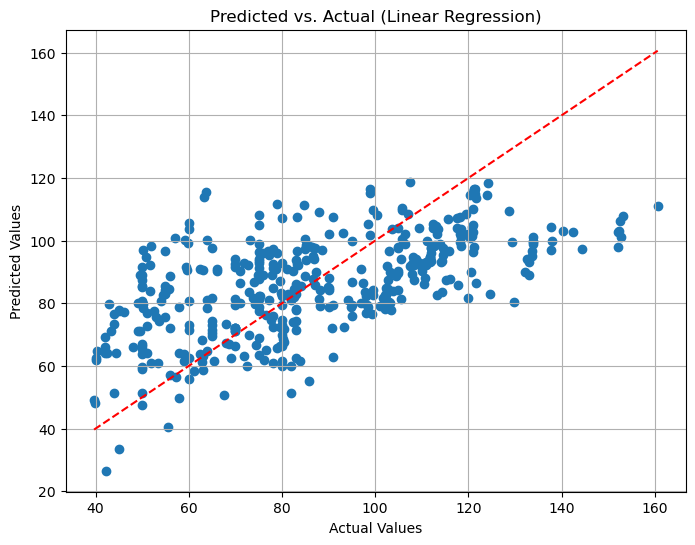

Linear Regression Results:
R-squared: 0.371777517908114
Mean Squared Error: 442.96654035923183
Mean Absolute Error: 17.336739262067038
Root Mean Squared Error (RMSE): 21.04677030708588




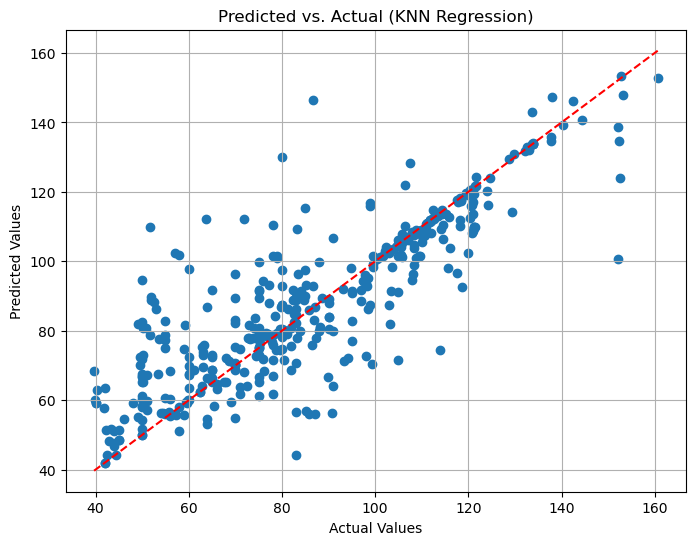

KNN Regression Results:
R-squared: 0.7241803567958769
Mean Squared Error: 194.48344590663314
Mean Absolute Error: 8.895748542316785
Root Mean Squared Error (RMSE): 13.945732175351466




ValueError: could not convert string to float: 'Female'

In [41]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Assuming 'Weight' is your target column
X = df.drop(columns=['Weight'])

# Exclude non-numeric columns
numeric_columns = X.select_dtypes(include=[np.number]).columns
X_numeric = X[numeric_columns]

y = df['Weight']

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numeric)


# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)

# Plotting Predicted vs. Actual for LR model
plt.figure(figsize=(8, 6))
plt.scatter(y_test, lr_predictions)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Adding a learning line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs. Actual (Linear Regression)")
plt.grid(True)
plt.show()

# Print Linear Regression results
print("Linear Regression Results:")
print("R-squared:", r2_score(y_test, lr_predictions))
print("Mean Squared Error:", mean_squared_error(y_test, lr_predictions))
print("Mean Absolute Error:", mean_absolute_error(y_test, lr_predictions))
print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_test, lr_predictions)))
print("\n")

# KNN Regression model
knn_model = KNeighborsRegressor()
knn_model.fit(X_train, y_train)
knn_predictions = knn_model.predict(X_test)

# Plotting Predicted vs. Actual for KNN model
plt.figure(figsize=(8, 6))
plt.scatter(y_test, knn_predictions)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Adding a learning line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs. Actual (KNN Regression)")
plt.grid(True)
plt.show()

# Print KNN Regression results
print("KNN Regression Results:")
print("R-squared:", r2_score(y_test, knn_predictions))
print("Mean Squared Error:", mean_squared_error(y_test, knn_predictions))
print("Mean Absolute Error:", mean_absolute_error(y_test, knn_predictions))
print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_test, knn_predictions)))
print("\n")

# Filter Method (e.g., Correlation Coefficient)
corr_matrix = df.corr()
corr_with_target = corr_matrix['Rented Bike Count'].abs().sort_values(ascending=False)
top_features = corr_with_target[1:6].index  # Selecting top 5 features
X_filtered = X[top_features]

# Standardizing the filtered features
X_filtered_scaled = scaler.fit_transform(X_filtered)

# Splitting the filtered data into training and testing sets
X_train_filtered, X_test_filtered, y_train_filtered, y_test_filtered = train_test_split(X_filtered_scaled, y, test_size=0.2, random_state=42)

# Linear Regression model with filtered features
lr_model_filtered = LinearRegression()
lr_model_filtered.fit(X_train_filtered, y_train_filtered)
lr_predictions_filtered = lr_model_filtered.predict(X_test_filtered)

# Plotting Predicted vs. Actual for LR model with filtered features
plt.figure(figsize=(8, 6))
plt.scatter(y_test_filtered, lr_predictions_filtered)
plt.plot([min(y_test_filtered), max(y_test_filtered)], [min(y_test_filtered), max(y_test_filtered)], color='red', linestyle='--')  # Adding a learning line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs. Actual (Linear Regression with Filtered Features)")
plt.grid(True)
plt.show()

# Print Linear Regression with filtered features results
print("Linear Regression with Filtered Features Results:")
print("R-squared:", r2_score(y_test_filtered, lr_predictions_filtered))
print("Mean Squared Error:", mean_squared_error(y_test_filtered, lr_predictions_filtered))
print("Mean Absolute Error:", mean_absolute_error(y_test_filtered, lr_predictions_filtered))
print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_test_filtered, lr_predictions_filtered)))
print("\n")

# OLS (Ordinary Least Squares) Regression with filtered features
X_train_filtered_ols = sm.add_constant(X_train_filtered)
X_test_filtered_ols = sm.add_constant(X_test_filtered)
ols_model_filtered = sm.OLS(y_train_filtered, X_train_filtered_ols).fit()
y_pred_filtered_ols = ols_model_filtered.predict(X_test_filtered_ols)

# Plotting Predicted vs. Actual for OLS model with filtered features
plt.figure(figsize=(8, 6))
plt.scatter(y_test_filtered, y_pred_filtered_ols)
plt.plot([min(y_test_filtered), max(y_test_filtered)], [min(y_test_filtered), max(y_test_filtered)], color='red', linestyle='--')  # Adding a learning line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs. Actual (OLS with Filtered Features)")
plt.grid(True)
plt.show()

# Printing OLS summary for filtered features
print("\n######################### OLS with Filtered Features ###################")
print(ols_model_filtered.summary())

# Evaluate OLS Regression with filtered features
r2_ols_filtered = r2_score(y_test_filtered, y_pred_filtered_ols)
mae_filtered = mean_absolute_error(y_test_filtered, y_pred_filtered_ols)
mse_filtered = mean_squared_error(y_test_filtered, y_pred_filtered_ols)
rmse_filtered = np.sqrt(mse_filtered)

print("\nOLS Results with Filtered Features:")
print("R-squared (R2) Score:", r2_ols_filtered)
print("Mean Absolute Error (MAE):", mae_filtered)
print("Mean Squared Error (MSE):", mse_filtered)
print("Root Mean Squared Error (RMSE):", rmse_filtered)


# With PCA(Princopal Component Analysis)

Without Cross-Validation:


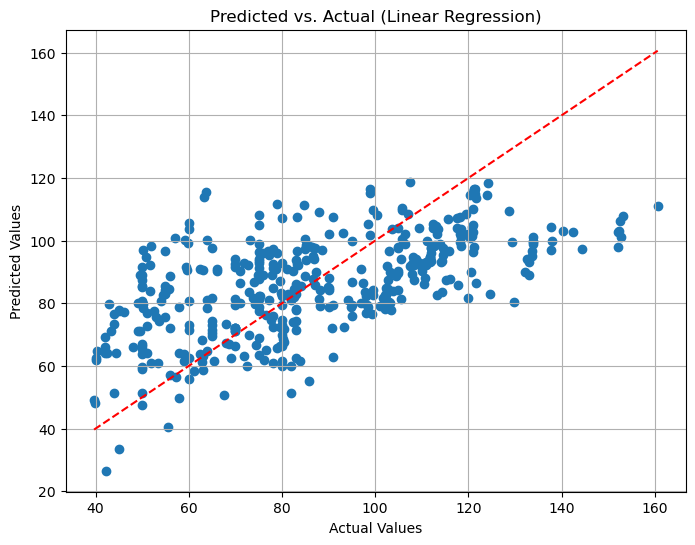

Linear Regression Results:
R-squared: 0.371777517908114
Mean Squared Error: 442.96654035923183
Mean Absolute Error: 17.336739262067038
Root Mean Squared Error (RMSE): 21.04677030708588




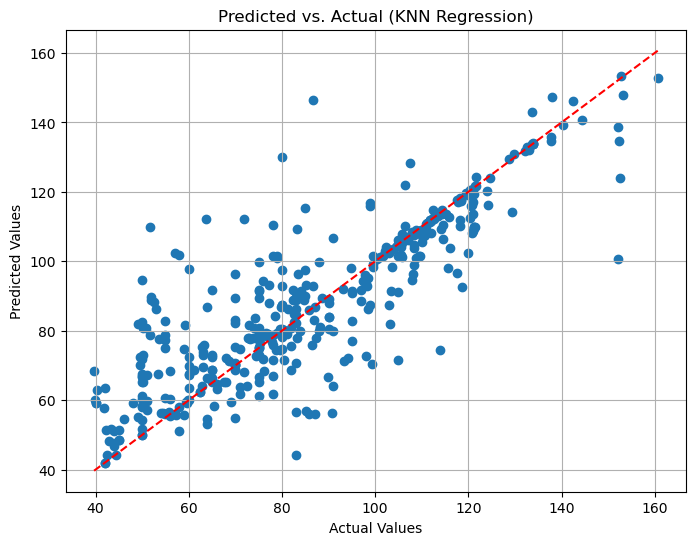

KNN Regression Results:
R-squared: 0.7241803567958769
Mean Squared Error: 194.48344590663314
Mean Absolute Error: 8.895748542316785
Root Mean Squared Error (RMSE): 13.945732175351466




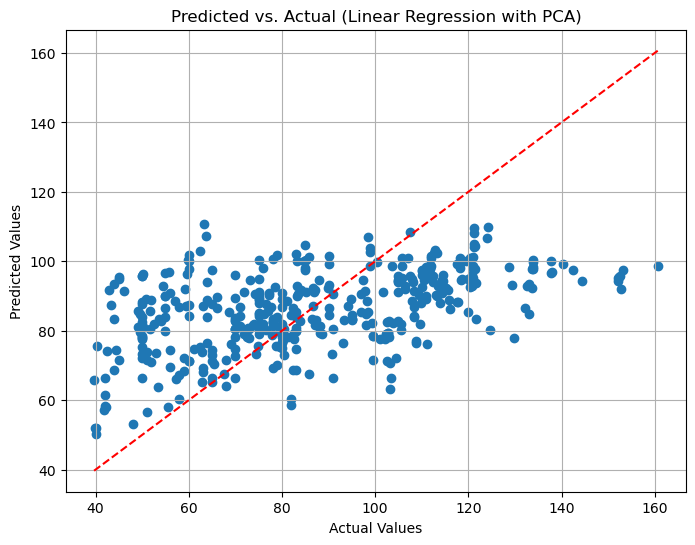

Linear Regression with PCA Results:
R-squared: 0.25406353476471855
Mean Squared Error: 525.9679568181037
Mean Absolute Error: 18.712769736321956
Root Mean Squared Error (RMSE): 22.93399129715767




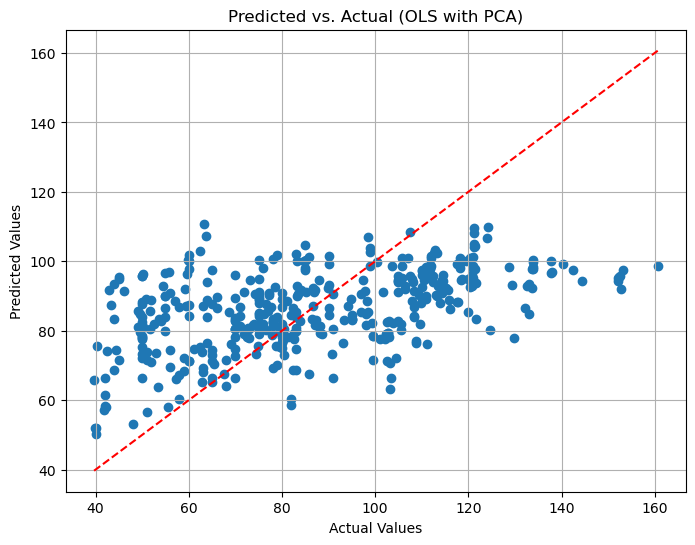


######################### OLS with PCA ###################
                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.197
Model:                            OLS   Adj. R-squared:                  0.195
Method:                 Least Squares   F-statistic:                     82.48
Date:                Mon, 01 Apr 2024   Prob (F-statistic):           1.32e-77
Time:                        02:00:28   Log-Likelihood:                -7715.7
No. Observations:                1688   AIC:                         1.544e+04
Df Residuals:                    1682   BIC:                         1.548e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------

In [42]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Assuming Weight is your target column
X = df.drop(columns=['Weight'])

# Exclude non-numeric columns
numeric_columns = X.select_dtypes(include=[np.number]).columns
X_numeric = X[numeric_columns]

y = df['Weight']

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numeric)

# Without cross-validation
print("Without Cross-Validation:")
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)

# Plotting Predicted vs. Actual for LR model
plt.figure(figsize=(8, 6))
plt.scatter(y_test, lr_predictions)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Adding a learning line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs. Actual (Linear Regression)")
plt.grid(True)
plt.show()

# Print Linear Regression results
print("Linear Regression Results:")
print("R-squared:", r2_score(y_test, lr_predictions))
print("Mean Squared Error:", mean_squared_error(y_test, lr_predictions))
print("Mean Absolute Error:", mean_absolute_error(y_test, lr_predictions))
print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_test, lr_predictions)))
print("\n")

# KNN Regression model
knn_model = KNeighborsRegressor()
knn_model.fit(X_train, y_train)
knn_predictions = knn_model.predict(X_test)

# Plotting Predicted vs. Actual for KNN model
plt.figure(figsize=(8, 6))
plt.scatter(y_test, knn_predictions)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Adding a learning line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs. Actual (KNN Regression)")
plt.grid(True)
plt.show()

# Print KNN Regression results
print("KNN Regression Results:")
print("R-squared:", r2_score(y_test, knn_predictions))
print("Mean Squared Error:", mean_squared_error(y_test, knn_predictions))
print("Mean Absolute Error:", mean_absolute_error(y_test, knn_predictions))
print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_test, knn_predictions)))
print("\n")

# PCA (Principal Component Analysis)
pca = PCA(n_components=5)  # Selecting 5 principal components
X_pca = pca.fit_transform(X_scaled)

# Splitting the PCA-transformed data into training and testing sets
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Linear Regression model with PCA
lr_model_pca = LinearRegression()
lr_model_pca.fit(X_train_pca, y_train_pca)
lr_predictions_pca = lr_model_pca.predict(X_test_pca)

# Plotting Predicted vs. Actual for LR model with PCA
plt.figure(figsize=(8, 6))
plt.scatter(y_test_pca, lr_predictions_pca)
plt.plot([min(y_test_pca), max(y_test_pca)], [min(y_test_pca), max(y_test_pca)], color='red', linestyle='--')  # Adding a learning line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs. Actual (Linear Regression with PCA)")
plt.grid(True)
plt.show()

# Print Linear Regression with PCA results
print("Linear Regression with PCA Results:")
print("R-squared:", r2_score(y_test_pca, lr_predictions_pca))
print("Mean Squared Error:", mean_squared_error(y_test_pca, lr_predictions_pca))
print("Mean Absolute Error:", mean_absolute_error(y_test_pca, lr_predictions_pca))
print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_test_pca, lr_predictions_pca)))
print("\n")

# OLS (Ordinary Least Squares) Regression with PCA
X_train_pca_ols = sm.add_constant(X_train_pca)
X_test_pca_ols = sm.add_constant(X_test_pca)
ols_model_pca = sm.OLS(y_train_pca, X_train_pca_ols).fit()
y_pred_pca_ols = ols_model_pca.predict(X_test_pca_ols)

# Plotting Predicted vs. Actual for OLS model with PCA
plt.figure(figsize=(8, 6))
plt.scatter(y_test_pca, y_pred_pca_ols)
plt.plot([min(y_test_pca), max(y_test_pca)], [min(y_test_pca), max(y_test_pca)], color='red', linestyle='--')  # Adding a learning line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs. Actual (OLS with PCA)")
plt.grid(True)
plt.show()

# Printing OLS summary for PCA
print("\n######################### OLS with PCA ###################")
print(ols_model_pca.summary())

# Evaluate OLS Regression with PCA
r2_ols_pca = r2_score(y_test_pca, y_pred_pca_ols)
mae_pca = mean_absolute_error(y_test_pca, y_pred_pca_ols)
mse_pca = mean_squared_error(y_test_pca, y_pred_pca_ols)
rmse_pca = np.sqrt(mse_pca)

print("\nOLS Results with PCA:")
print("R-squared (R2) Score:", r2_ols_pca)
print("Mean Absolute Error (MAE):", mae_pca)
print("Mean Squared Error (MSE):", mse_pca)
print("Root Mean Squared Error (RMSE):", rmse_pca)


# SUMMARY:

1) KNN Regression remains the most effective model, with the highest R-squared (0.72) and lowest error metrics.
2) Surprisingly, applying PCA to both Linear Regression and OLS Regression resulted in worse performance compared to the models without PCA. 


### Overall Interpretation:

1) KNN Regression continues to be the clear winner for predicting weight in this dataset.
2) Applying PCA to the data seems to have a negative impact on the performance of both Linear Regression and OLS Regression models.

